In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
import sys
import os

PROJECT_PATH = '/home/adiel/full-temporal-relation'
if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)
    
from full_temporal_relation.data.preprocessing import load_data

In [2]:
MATRES_DATA_PATH = Path('../data') / 'MATRES'

In [9]:
aquaint_df = load_data(MATRES_DATA_PATH / 'aquaint.txt')
aquaint_df

,docid,verb1,verb2,eiid1,eiid2,relation
0,NYT20000406.0002,said,made,e1,e2,AFTER
1,NYT20000406.0002,made,raised,e2,e5,AFTER
2,NYT20000406.0002,left,stir,e17,e19,EQUAL
3,NYT20000406.0002,left,demanded,e17,e21,BEFORE
4,NYT20000406.0002,stir,demanded,e19,e21,BEFORE
...,...,...,...,...,...,...
6399,APW19980911.0475,transferred,transported,e28,e31,VAGUE
6400,APW19980911.0475,said,exploded,e29,e30,AFTER
6401,APW19980911.0475,said,transported,e29,e31,AFTER
6402,APW19980911.0475,exploded,transported,e30,e31,BEFORE


In [17]:
for _, row in aquaint_df[aquaint_df.docid == 'APW19980807.0261'].iterrows():
    print(f'- {row.eiid1} {row.relation} {row.eiid2}')

- e1 BEFORE e2
- e1 BEFORE e3
- e2 BEFORE e3
- e1 BEFORE e12
- e1 BEFORE e4
- e2 BEFORE e12
- e2 BEFORE e4
- e3 AFTER e12
- e3 BEFORE e4
- e12 BEFORE e4
- e12 BEFORE e5
- e4 VAGUE e5
- e5 VAGUE e8
- e5 AFTER e9
- e5 BEFORE e10
- e8 AFTER e9
- e8 BEFORE e10
- e9 BEFORE e10


In [18]:
print("""
Former President Nicolas Sarkozy was e1:informed Thursday that he would e2:face a formal e21:investigation into whether he e3:abused the frailty of Liliane Bettencourt, 90, the heiress to the L'Oreal fortune and France's richest woman, to e4:get funds for his 2007 presidential e1000:campaign. Mr. Sarkozy has e5:denied e6:accepting illegal campaign funds from Ms. Bettencourt, either personally or through his party treasurer at the time, Eric Woerth, as e7:alleged by her former butler. Mr. Sarkozy's lawyer, Thierry Herzog, e8:called the judge's e9:decision, which e10:indicates that the judge e11:believes that Mr. Sarkozy probably committed a e23:crime, "incoherent" and "unjust." The lawyer e13:said he would e14:appeal. The e15:ruling does not necessarily e16:mean that Mr. Sarkozy, who e17:lost his re-election e18:bid last May and with it his presidential immunity from prosecution, will e19:stand e20:trial.
""")


Former President Nicolas Sarkozy was e1:informed Thursday that he would e2:face a formal e21:investigation into whether he e3:abused the frailty of Liliane Bettencourt, 90, the heiress to the L'Oreal fortune and France's richest woman, to e4:get funds for his 2007 presidential e1000:campaign. Mr. Sarkozy has e5:denied e6:accepting illegal campaign funds from Ms. Bettencourt, either personally or through his party treasurer at the time, Eric Woerth, as e7:alleged by her former butler. Mr. Sarkozy's lawyer, Thierry Herzog, e8:called the judge's e9:decision, which e10:indicates that the judge e11:believes that Mr. Sarkozy probably committed a e23:crime, "incoherent" and "unjust." The lawyer e13:said he would e14:appeal. The e15:ruling does not necessarily e16:mean that Mr. Sarkozy, who e17:lost his re-election e18:bid last May and with it his presidential immunity from prosecution, will e19:stand e20:trial.



In [4]:
aquaint_df.groupby('docid').relation.count().reset_index(name='count').sort_values(['count'], ascending=False)

,docid,count
45,NYT19990312.0271,378
12,APW19990122.0193,262
41,NYT19981025.0216,249
51,NYT20000224.0173,248
58,NYT20000601.0442,223
...,...,...
69,XIE19990227.0171,9
14,APW19990216.0198,6
55,NYT20000406.0002,6
3,APW19980810.0907,3


<Axes: xlabel='relation'>

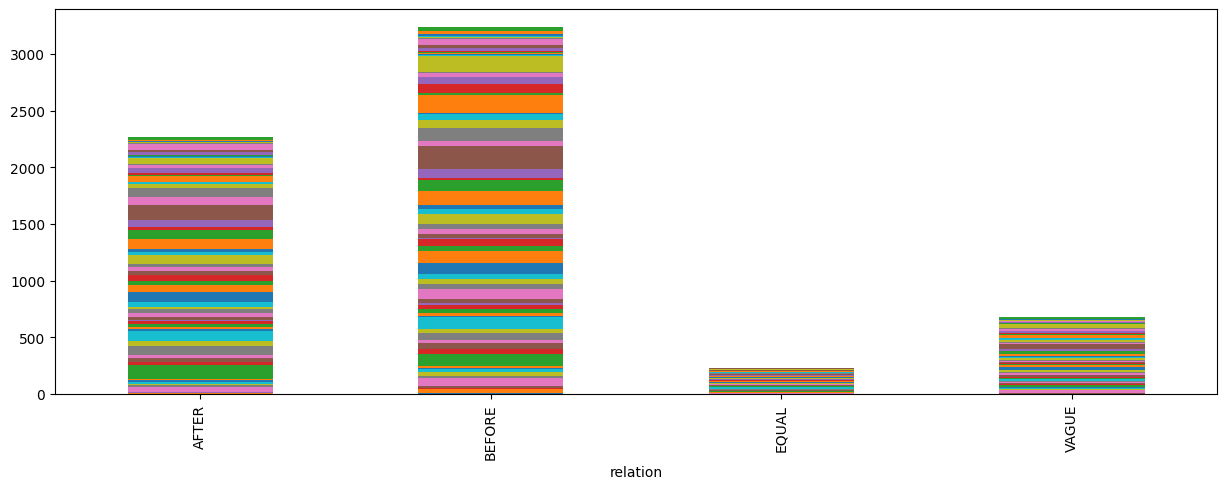

In [27]:
aquaint_df.groupby('relation').docid.value_counts().unstack().plot(kind='bar', stacked=True, legend=False, figsize=(15, 5))

In [5]:
def plot_relation_bars(df, ax=None, title=''):
    df_relation = df.relation.value_counts()
    df_relation_dist = df_relation / df_relation.sum()

    df_relation_dist.to_frame().plot(kind='bar', ax=ax)
    for i, n in enumerate(df_relation_dist):
        if ax:
            ax.text(i, n / 2, f'{np.round(n, 3)}%', va = 'center', ha = 'center')
            ax.set_title(title)
        else:
            plt.text(i, n / 2, f'{np.round(n, 3)}%', va = 'center', ha = 'center')
    return df_relation.reset_index()

In [4]:
platinum_df = pd.read_csv(MATRES_DATA_PATH / 'platinum.txt', sep='\t', header=None,
                         names=['docid', 'verb1', 'verb2', 'eiid1', 'eiid2', 'relation'])
platinum_df

,docid,verb1,verb2,eiid1,eiid2,relation
0,WSJ_20130322_159,apologized,happened,1,5,VAGUE
1,WSJ_20130322_159,apologized,wrapped,1,6,BEFORE
2,WSJ_20130322_159,apologized,seemed,1,10,BEFORE
3,WSJ_20130322_159,apologized,yield,1,11,VAGUE
4,WSJ_20130322_159,happened,wrapped,5,6,BEFORE
...,...,...,...,...,...,...
832,CNN_20130322_248,sparing,begin,3,6,BEFORE
833,CNN_20130322_248,sparing,said,3,7,EQUAL
834,CNN_20130322_248,expected,begin,4,6,BEFORE
835,CNN_20130322_248,expected,said,4,7,BEFORE


In [6]:
platinum_df.docid.nunique()

20

In [5]:
timebank_df = pd.read_csv(MATRES_DATA_PATH / 'timebank.txt', sep='\t', header=None,
                         names=['docid', 'verb1', 'verb2', 'eiid1', 'eiid2', 'relation'])
timebank_df

,docid,verb1,verb2,eiid1,eiid2,relation
0,ABC19980120.1830.0957,predicted,tried,415,417,BEFORE
1,ABC19980120.1830.0957,predicted,hasten,415,418,BEFORE
2,ABC19980120.1830.0957,tried,hasten,417,418,VAGUE
3,ABC19980120.1830.0957,predicted,endures,415,419,BEFORE
4,ABC19980120.1830.0957,tried,endures,417,419,BEFORE
...,...,...,...,...,...,...
6331,wsj_0586,closed,cited,1511,1515,BEFORE
6332,wsj_0586,mixed,cited,1513,1515,BEFORE
6333,wsj_0586,cited,closed,1515,1517,AFTER
6334,wsj_0586,closed,caused,1517,1521,AFTER


In [7]:
timebank_df.docid.nunique()

182

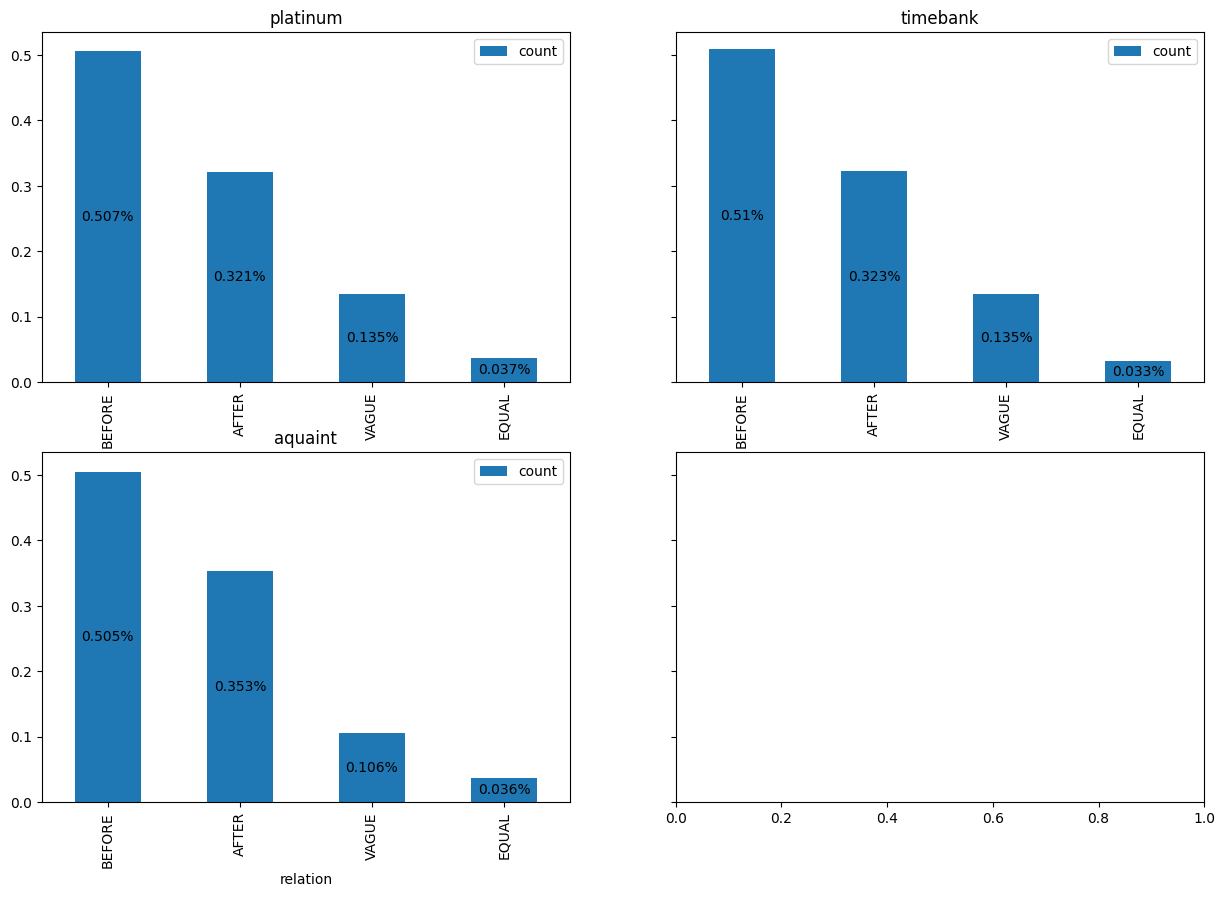

In [75]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 10))
platinum_relation_df = plot_relation_bars(df=platinum_df, ax=axes[0][0], title='platinum')
timebank_relation_df = plot_relation_bars(df=timebank_df, ax=axes[0][1], title='timebank')
aquaint_relation_df = plot_relation_bars(df=aquaint_df, ax=axes[1][0], title='aquaint')

In [76]:
from IPython.display import display_html

platinum_styler = platinum_relation_df.style.set_table_attributes("style='display:inline'").set_caption('platinum')
timebank_styler = timebank_relation_df.style.set_table_attributes("style='display:inline'").set_caption('timebank')
aquaint_styler = aquaint_relation_df.style.set_table_attributes("style='display:inline'").set_caption('aquaint')

display_html(platinum_styler._repr_html_()+timebank_styler._repr_html_()+aquaint_styler._repr_html_(), raw=True)

,relation,count
0,BEFORE,424
1,AFTER,269
2,VAGUE,113
3,EQUAL,31
,relation,count
0,BEFORE,3229
1,AFTER,2044
2,VAGUE,855
3,EQUAL,208
,relation,count


In [4]:
from functools import reduce

supported_relation = ['AFTER', 'BEFORE']

def create_edges(df):
    edges_df = pd.DataFrame()
    edges_df[['source', 'target']] = df[['docid', 'eiid1', 'eiid2', 'relation']] \
        .apply(lambda row: (f"{row.docid}-{row['eiid2']}" ,f"{row.docid}-{row['eiid1']}")
                if row['relation'] == 'AFTER' else (f"{row.docid}-{row['eiid1']}" , f"{row.docid}-{row['eiid2']}"),
               axis='columns', result_type="expand")
    return edges_df

def create_nodes(df):
    nodes_raw_df = df.apply(lambda row: [dict(docid=row.docid, verb=row.verb1, eiid=f"{row.docid}-{row.eiid1}"),
                                  dict(docid=row.docid, verb=row.verb2, eiid=f"{row.docid}-{row.eiid2}")], axis='columns').to_list()
    nodes_flatten = reduce(lambda x, y: x+y, nodes_raw_df)
    return pd.DataFrame(nodes_flatten).drop_duplicates(ignore_index=True)

def generate_directed_graph(df, relations=supported_relation):
    df = df.loc[df['relation'].isin(relations)]
    edges = create_edges(df)
    nodes = create_nodes(df)

    G = nx.DiGraph()
    G = nx.from_pandas_edgelist(edges, create_using=nx.DiGraph)
    nx.set_node_attributes(G, dict(zip(nodes.eiid, nodes.docid)), 'docid')
    nx.set_node_attributes(G, dict(zip(nodes.eiid, nodes.verb)), 'verb')
    return G

def generate_subgraph_by_docid(graph, doc_id):
    sub_graph = []
    for (n, data) in aquaint_graph.nodes(data=True):
      if data['docid'] == doc_id:
        sub_graph.append(n)
    
    return aquaint_graph.subgraph(sub_graph).copy()

In [5]:
def draw_directed_graph(graph):
    import matplotlib.pyplot as plt

    plt.rcParams["figure.figsize"] = (15,10)

    labels = nx.get_node_attributes(graph, 'verb') 
    pos = nx.circular_layout(graph)
    
    nx.draw_networkx_nodes(graph, pos)
    nx.draw_networkx_labels(graph, pos, labels=labels)
    nx.draw_networkx_edges(
        graph, 
        pos, 
        arrows=True,
        edgelist=graph.edges(), 
        edge_color='blue', 
        width=3, 
        label="S", 
        arrowstyle='-|>')
    
    # plt.legend(fontsize = 'medium')
    plt.show()

In [34]:
from itertools import chain, product, starmap
from functools import partial

def create_simple_graph(graph):

    # find connected components
    conn_components = nx.connected_components(graph.to_undirected())

    simple_edges = []
    for nodes in conn_components:
        # create copy of DiGraph
        sub_shallow = graph.subgraph(nodes).copy()

        if len(sub_shallow.edges) <= 2:
            simple_edges.extend([edge for edge in sub_shallow.edges])
            continue
            
        new_graph = nx.DiGraph()
        new_graph.add_nodes_from(sub_shallow.nodes(data=True))
        new_graph.add_edges_from(sub_shallow.edges)
    
        # find simple paths
        chaini = chain.from_iterable
        roots = (v for v, d in new_graph.in_degree() if d == 0)
        leaves = (v for v, d in new_graph.out_degree() if d == 0)
        
        all_paths = partial(nx.all_simple_paths, new_graph)
        all_simple_paths = chaini(starmap(all_paths, product(roots, leaves)))
        
        # remove redundant paths
        sorted_path = sorted(all_simple_paths, key=lambda x: -len(x))
        sorted_path = [list(zip(path[:-1], path[1:])) for path in sorted_path]
        max_path = set(sorted_path[0])

        simple_edges.append(sorted_path[0])
        for path in sorted_path[1:]:
            if len(max_path | set(path)) > len(max_path):
                max_path.update(path)
                simple_edges.append(path)

    simple_graph = nx.DiGraph()
    simple_graph.add_nodes_from(graph.nodes(data=True))

    for path in simple_edges:
        nx.add_path(simple_graph, path)
        
    return simple_graph, simple_edges

In [7]:
aquaint_graph = generate_directed_graph(df=aquaint_df)

In [14]:
k = generate_subgraph_by_docid(aquaint_graph, doc_id='XIE19990227.0171')
# simple_k, simple_k_edges = create_simple_graph(graph=k)
# draw_directed_graph(simple_k)

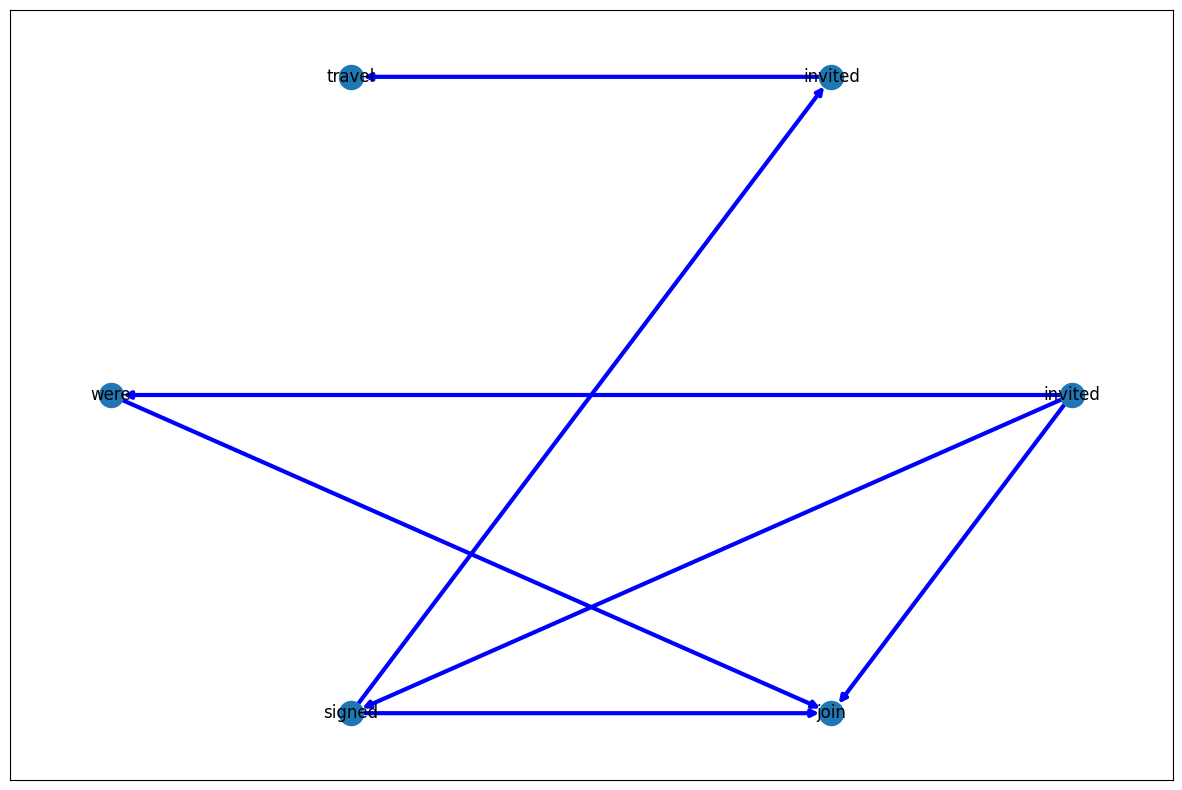

In [52]:
conn_components = nx.connected_components(k.to_undirected())

simple_edges = []
for nodes in conn_components:
    # create copy of DiGraph
    sub_shallow = aquaint_graph.subgraph(nodes).copy()

    if len(sub_shallow.edges) <= 2:
            simple_edges.extend([edge for edge in sub_shallow.edges])
            continue

    new_graph = nx.DiGraph()
    new_graph.add_nodes_from(sub_shallow.nodes(data=True))
    new_graph.add_edges_from(sub_shallow.edges)

    chaini = chain.from_iterable
    roots = (v for v, d in new_graph.in_degree() if d == 0)
    leaves = (v for v, d in new_graph.out_degree() if d == 0)

    all_paths = partial(nx.all_simple_paths, new_graph)
    all_simple_paths = chaini(starmap(all_paths, product(roots, leaves)))

    # remove redundant paths
    sorted_path = sorted(all_simple_paths, key=lambda x: -len(x))
    sorted_path = [list(zip(path[:-1], path[1:])) for path in sorted_path]
    max_path = set(sorted_path[0])

    simple_edges.extend(sorted_path[0])
    for path in sorted_path[1:]:
        for edge in path:
            if len(max_path | set(edge)) > len(max_path):
                max_path.update(edge)
                simple_edges.append(edge)

    draw_directed_graph(new_graph)
    break

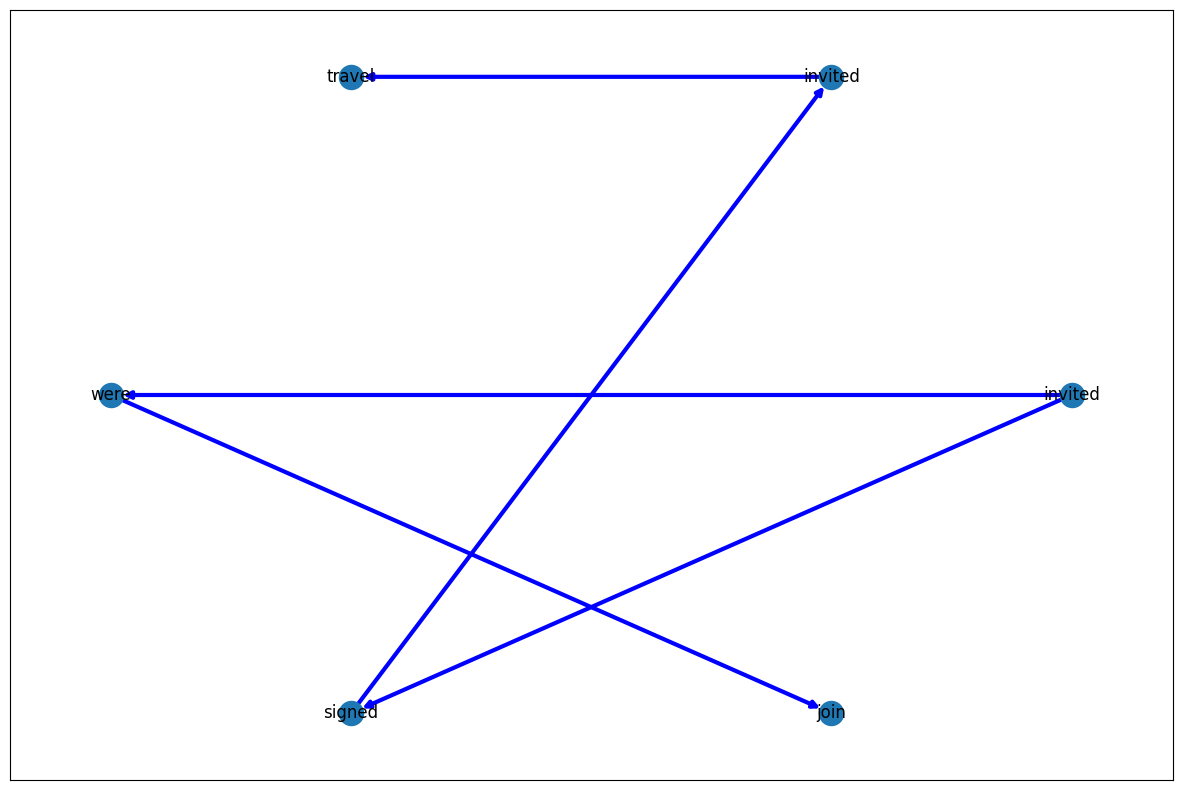

In [53]:
simple_edges

simple_graph = nx.DiGraph()
simple_graph.add_nodes_from(new_graph.nodes(data=True))
simple_graph.add_edges_from(simple_edges)

draw_directed_graph(simple_graph)

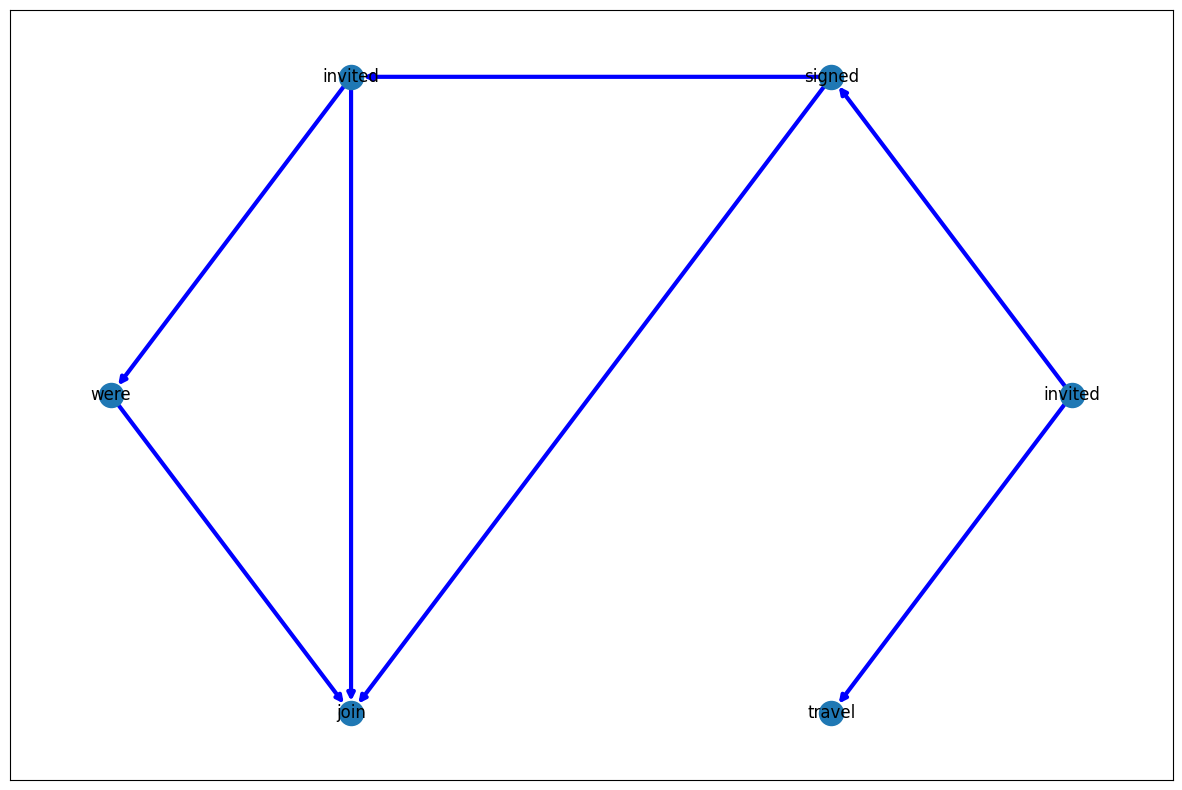

In [48]:
draw_directed_graph(k)

In [26]:
[n for n in k.nodes(data=True)]

[('XIE19990227.0171-10', {'docid': 'XIE19990227.0171', 'verb': 'join'}),
 ('XIE19990227.0171-13', {'docid': 'XIE19990227.0171', 'verb': 'invited'}),
 ('XIE19990227.0171-15', {'docid': 'XIE19990227.0171', 'verb': 'travel'}),
 ('XIE19990227.0171-6', {'docid': 'XIE19990227.0171', 'verb': 'were'}),
 ('XIE19990227.0171-8', {'docid': 'XIE19990227.0171', 'verb': 'invited'}),
 ('XIE19990227.0171-12', {'docid': 'XIE19990227.0171', 'verb': 'signed'})]

In [28]:
mapping_k = {n: d['verb'] for n, d in k.nodes(data=True)}

In [29]:
[[mapping_k[p] for p in lp] for lp in simple_k_edges]

[['join', 'were', 'invited', 'signed'],
 ['invited', 'travel'],
 ['invited', 'signed']]

{'XIE19990227.0171-13', 'XIE19990227.0171-12', 'XIE19990227.0171-8', 'XIE19990227.0171-6', 'XIE19990227.0171-10', 'XIE19990227.0171-15'}


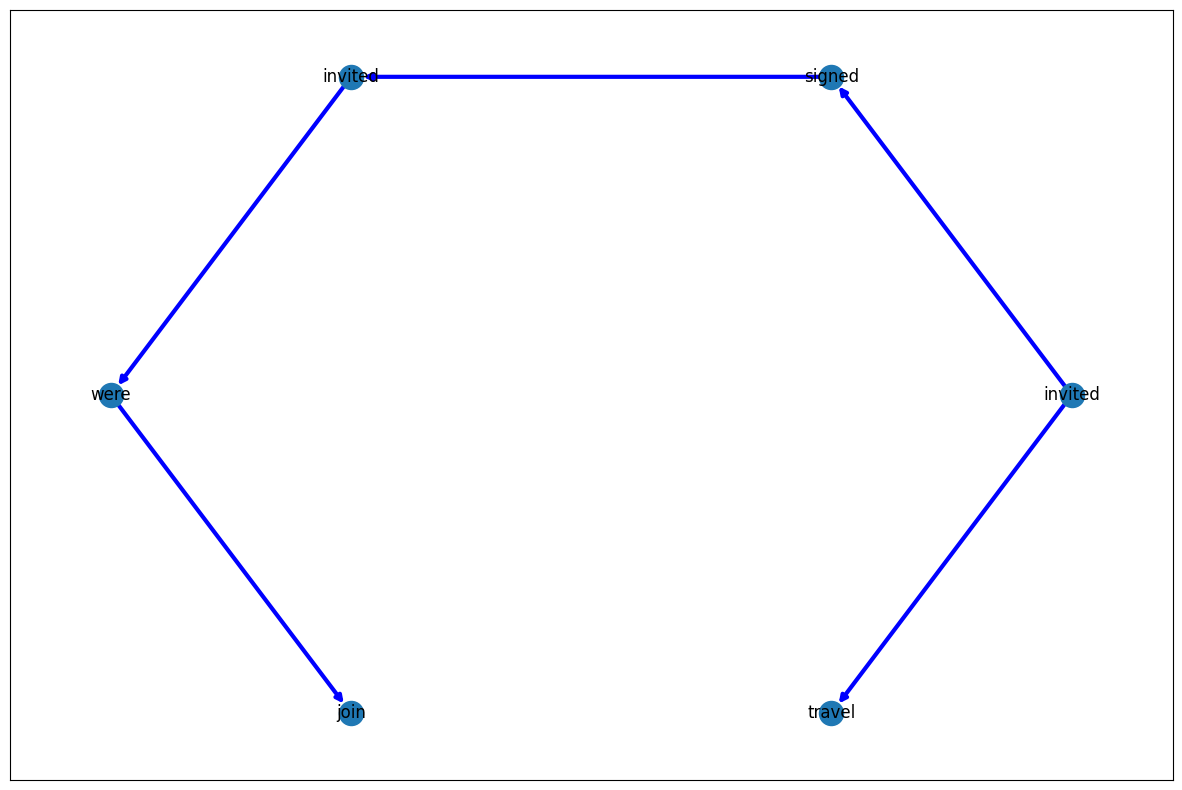

In [49]:
simple_k = create_simple_graph(graph=k)
draw_directed_graph(simple_k)

In [8]:
# from pyvis.network import Network

# net = Network(
#     directed = True,
#     select_menu = True, # Show part 1 in the plot (optional)
#     filter_menu = True, # Show part 2 in the plot (optional)
#     notebook=True,
#     cdn_resources='in_line'
# )
# net.show_buttons() # Show part 3 in the plot (optional)
# net.from_nx(G) # Create directly from nx graph
# net.show('test.html')

test.html


In [6]:
from neo4j import GraphDatabase

uri = "bolt://localhost:7687"
username = password = "neo4j"
driver = GraphDatabase.driver(uri, auth=(username, password))

In [6]:
supported_relation = ['AFTER', 'BEFORE']

def generate_graph_relation(df, relations=supported_relation):
    df = df.loc[df['relation'].isin(relations)]
    edges_df = pd.DataFrame()
    edges_df[['source', 'target', 'relation']] = df[['docid', 'eiid1', 'eiid2', 'relation']] \
            .apply(lambda row: (f"{row.docid}-{row['eiid2']}" ,f"{row.docid}-{row['eiid1']}", row.relation)
                    if row['relation'] == 'AFTER' else (f"{row.docid}-{row['eiid1']}" , f"{row.docid}-{row['eiid2']}", row.relation),
                   axis='columns', result_type="expand")
    return edges_df

In [7]:
aquaint_graph = generate_graph_relation(df=aquaint_df)
aquaint_graph

,source,target,relation
0,NYT20000406.0002-2,NYT20000406.0002-1,AFTER
1,NYT20000406.0002-5,NYT20000406.0002-2,AFTER
3,NYT20000406.0002-17,NYT20000406.0002-21,BEFORE
4,NYT20000406.0002-19,NYT20000406.0002-21,BEFORE
6,NYT19990419.0515-3,NYT19990419.0515-2,AFTER
...,...,...,...
6396,APW19980911.0475-27,APW19980911.0475-31,BEFORE
6400,APW19980911.0475-30,APW19980911.0475-29,AFTER
6401,APW19980911.0475-31,APW19980911.0475-29,AFTER
6402,APW19980911.0475-30,APW19980911.0475-31,BEFORE


In [8]:
aquaint_df[['eiid1_new', 'eiid2_new']] = aquaint_df\
            .apply(lambda row: (f"{row.docid}-{row['eiid1']}" ,f"{row.docid}-{row['eiid2']}"),
                   axis='columns', result_type="expand")
aquaint_df

,docid,verb1,verb2,eiid1,eiid2,relation,eiid1_new,eiid2_new
0,NYT20000406.0002,said,made,1,2,AFTER,NYT20000406.0002-1,NYT20000406.0002-2
1,NYT20000406.0002,made,raised,2,5,AFTER,NYT20000406.0002-2,NYT20000406.0002-5
2,NYT20000406.0002,left,stir,17,19,EQUAL,NYT20000406.0002-17,NYT20000406.0002-19
3,NYT20000406.0002,left,demanded,17,21,BEFORE,NYT20000406.0002-17,NYT20000406.0002-21
4,NYT20000406.0002,stir,demanded,19,21,BEFORE,NYT20000406.0002-19,NYT20000406.0002-21
...,...,...,...,...,...,...,...,...
6399,APW19980911.0475,transferred,transported,28,31,VAGUE,APW19980911.0475-28,APW19980911.0475-31
6400,APW19980911.0475,said,exploded,29,30,AFTER,APW19980911.0475-29,APW19980911.0475-30
6401,APW19980911.0475,said,transported,29,31,AFTER,APW19980911.0475-29,APW19980911.0475-31
6402,APW19980911.0475,exploded,transported,30,31,BEFORE,APW19980911.0475-30,APW19980911.0475-31


In [ ]:
aquaint_df

In [41]:
nodes = set(zip(aquaint_df['eiid1_new'], aquaint_df['verb1'], aquaint_df['docid'])) | set(zip(aquaint_df['eiid2_new'], aquaint_df['verb2'], aquaint_df['docid']))
nodes_mapping = pd.DataFrame(columns=['id', 'verb', 'docid'], data=nodes)
nodes_mapping

,id,verb,docid
0,APW19991008.0151-23,offered,APW19991008.0151
1,APW20000417.0031-145,abused,APW20000417.0031
2,NYT19990312.0271-172,brought,NYT19990312.0271
3,APW20000405.0276-4,won,APW20000405.0276
4,NYT20000224.0173-4,ducked,NYT20000224.0173
...,...,...,...
2399,NYT19990505.0443-2,concluded,NYT19990505.0443
2400,NYT19990505.0443-60,appears,NYT19990505.0443
2401,APW19990507.0207-57,charged,APW19990507.0207
2402,XIE19980808.0188-2,said,XIE19980808.0188


In [40]:
pd.DataFrame(columns=['id', 'verb', 'docid'], data=nodes)

,id,verb,docid
0,APW19991008.0151-23,offered,APW19991008.0151
1,APW20000417.0031-145,abused,APW20000417.0031
2,NYT19990312.0271-172,brought,NYT19990312.0271
3,APW20000405.0276-4,won,APW20000405.0276
4,NYT20000224.0173-4,ducked,NYT20000224.0173
...,...,...,...
2399,NYT19990505.0443-2,concluded,NYT19990505.0443
2400,NYT19990505.0443-60,appears,NYT19990505.0443
2401,APW19990507.0207-57,charged,APW19990507.0207
2402,XIE19980808.0188-2,said,XIE19980808.0188


In [46]:
def create_before_relationships(tx, relationships):
    query = (
        "MATCH (n1:Word {id: $eiid1_new}), (n2:Word {id: $eiid2_new})"
        "CREATE (n1)-[:BEFORE]->(n2)"
    )
    tx.run(query, **relationships)
    
def create_after_relationships(tx, relationships):
    query = (
        "MATCH (n1:Word {id: $eiid1_new}), (n2:Word {id: $eiid2_new})"
        "CREATE (n1)<-[:AFTER]-(n2)"
    )
    tx.run(query, **relationships)
    
def create_nodes(tx, relationships):
    query = (
        "MERGE (node:Word {id: $id, text: $verb, doc_id: $docid})"
    )
    tx.run(query, **relationships)

with driver.session() as session:
    for node in nodes_mapping.to_dict(orient='records'):
        session.execute_write(create_nodes, node)
    
    for relationship in aquaint_df[aquaint_df.relation == 'BEFORE'].to_dict(orient='records'):
        session.execute_write(create_before_relationships, relationship)
        
    for relationship in aquaint_df[aquaint_df.relation == 'AFTER'].to_dict(orient='records'):
        session.execute_write(create_after_relationships, relationship)
 

In [19]:
aquaint_df[aquaint_df.relation == 'BEFORE'].to_dict(orient='records')[0]

{'docid': 'NYT20000406.0002',
 'verb1': 'left',
 'verb2': 'demanded',
 'eiid1': 17,
 'eiid2': 21,
 'relation': 'BEFORE',
 'eiid1_new': 'NYT20000406.0002-17',
 'eiid2_new': 'NYT20000406.0002-21'}